In [336]:
import numpy as np
import pandas as pd
import sys
import os
import importlib

sys.path.append(os.path.abspath("../base"))
import classify
import features
pd.set_option("display.max_columns", None)

In [476]:
importlib.reload(classify)  # Reload the classify module
importlib.reload(features)

<module 'features' from '/Users/kevinwong/Library/CloudStorage/GoogleDrive-kew024@ucsd.edu/My Drive/UCSD Winter Quarter 2025/dsc180b/dsc180b-capstone-q2/src/base/features.py'>

In [488]:
categories, consumer, acct, transactions = features.get_datasets()
transaction_categories = features.get_transaction_categories(transactions, categories)
all_features = features.one_hot_accounts(acct, consumer, how = 'notnormal')
all_features = features.get_total_transactions(all_features, transaction_categories)

In [489]:
all_features = features.get_categorical_features2(
    all_features, transaction_categories, acct
)

In [490]:
all_features.to_csv('../../data_q2/features.csv', index = False)

In [480]:
all_features = pd.read_csv("../../data_q2/features.csv")
na_consumers = consumer[consumer["DQ_TARGET"].isna()]["prism_consumer_id"].astype(int)
all_features = all_features[~all_features["prism_consumer_id"].isin(na_consumers)]
all_features = all_features.set_index('prism_consumer_id')
all_features = all_features[all_features['transactions'] > 1]


LightGBM Results
ROC-AUC: 0.818 | Accuracy: 0.916
Training Time: 4.1s | Predicting Time: 0.000025s
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96       911
         1.0       0.46      0.16      0.24        81

    accuracy                           0.92       992
   macro avg       0.70      0.57      0.60       992
weighted avg       0.89      0.92      0.90       992



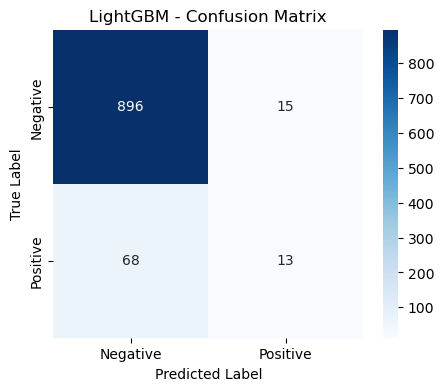


XGBoost Results
ROC-AUC: 0.823 | Accuracy: 0.909
Training Time: 5.4s | Predicting Time: 0.000018s
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95       911
         1.0       0.37      0.16      0.22        81

    accuracy                           0.91       992
   macro avg       0.65      0.57      0.59       992
weighted avg       0.88      0.91      0.89       992



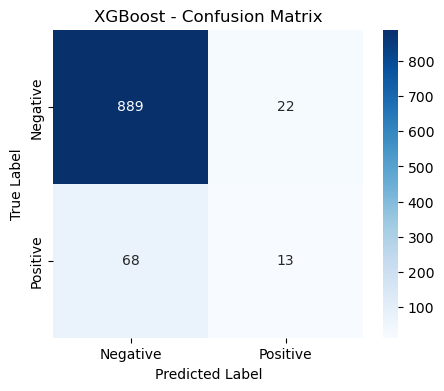


CatBoost Results
ROC-AUC: 0.820 | Accuracy: 0.907
Training Time: 7.3s | Predicting Time: 0.000018s
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       911
         1.0       0.39      0.23      0.29        81

    accuracy                           0.91       992
   macro avg       0.66      0.60      0.62       992
weighted avg       0.89      0.91      0.90       992



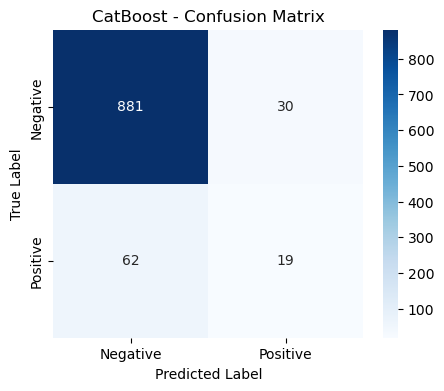


Ensemble model saved as 'WeightedEnsemble.joblib'

Ensemble Model Results
ROC-AUC: 0.828 | Accuracy: 0.912
Precision: 0.885 | Recall: 0.912 | F1-score: 0.893
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95       911
         1.0       0.40      0.15      0.22        81

    accuracy                           0.91       992
   macro avg       0.66      0.56      0.58       992
weighted avg       0.89      0.91      0.89       992


======================================== FINAL RESULTS ========================================
            model  roc_auc  accuracy  precision   recall  f1-score  train_time  predict_time
Weighted Ensemble 0.828380  0.912298   0.885139 0.912298  0.893345         NaN           NaN
          XGBoost 0.823041  0.909274   0.883422 0.909274  0.892403    5.395553      0.000018
         CatBoost 0.819924  0.907258   0.889629 0.907258  0.896644    7.251711      0.000018
         LightGBM 0.817525  0.916331   0.8914

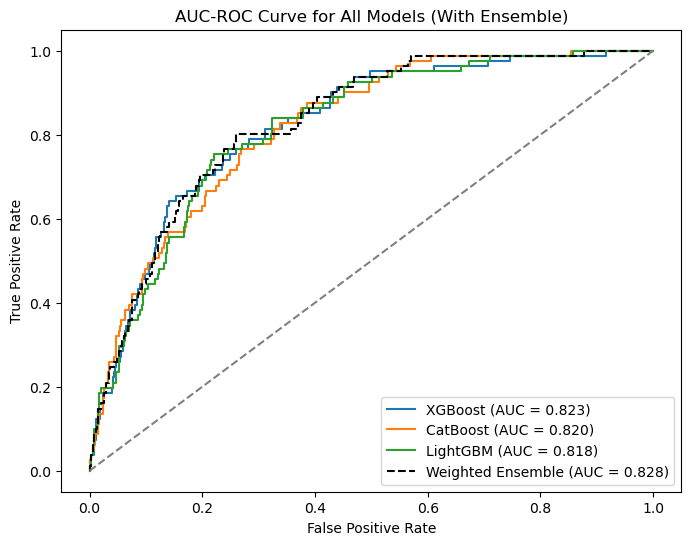

(               model   roc_auc  accuracy  train_time  predict_time  precision  \
 3  Weighted Ensemble  0.828380  0.912298         NaN           NaN   0.885139   
 1            XGBoost  0.823041  0.909274    5.395553      0.000018   0.883422   
 2           CatBoost  0.819924  0.907258    7.251711      0.000018   0.889629   
 0           LightGBM  0.817525  0.916331    4.140963      0.000025   0.891478   
 
      recall  f1-score  support  
 3  0.912298  0.893345      NaN  
 1  0.909274  0.892403    992.0  
 2  0.907258  0.896644    992.0  
 0  0.916331  0.897172    992.0  ,
 {'LightGBM': LGBMClassifier(colsample_bytree=0.8, force_row_wise=True, learning_rate=0.05,
                 n_estimators=200, objective='binary', subsample=0.8, verbose=-1),
  'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=0.8, device=None, early_stopping_rounds=None,
                enable_cat

In [481]:
classification_features = (all_features.drop(columns = ['evaluation_date', 'DQ_TARGET'])).columns
classify.run_classification2(classification_features, "DQ_TARGET", all_features)

In [483]:
classification_features = (
    all_features.drop(columns=["evaluation_date", "DQ_TARGET"])
).columns
best_features = classify.get_best_features(classification_features, 'DQ_TARGET', all_features, n_features = 200)

/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning:

invalid value encountered in divide




Top Features (RandomForestClassifier):
                           Feature  Importance  Correlation
                      credit_score    0.050784    -0.284885
              account_type_SAVINGS    0.041741    -0.136489
                           balance    0.032664    -0.034346
                  OVERDRAFT_median    0.023635     0.055188
                ACCOUNT_FEES_count    0.023394     0.008538
               ACCOUNT_FEES_median    0.023057     0.024271
                  ACCOUNT_FEES_std    0.018445     0.014375
                   OVERDRAFT_count    0.018413     0.091365
                     OVERDRAFT_std    0.015225     0.112289
                        LOAN_count    0.014222     0.064287
                          LOAN_std    0.014181     0.001689
                          BNPL_iqr    0.011345     0.009954
                    income_per_day    0.011130    -0.006894
                 SELF_TRANSFER_iqr    0.010746    -0.063588
                          BNPL_std    0.009498     0.043813



LightGBM Results
ROC-AUC: 0.816 | Accuracy: 0.905
Training Time: 3.8s | Predicting Time: 0.000028s
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       911
         1.0       0.28      0.10      0.15        81

    accuracy                           0.91       992
   macro avg       0.60      0.54      0.55       992
weighted avg       0.87      0.91      0.88       992



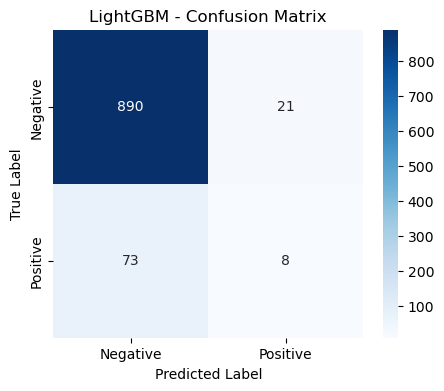


XGBoost Results
ROC-AUC: 0.820 | Accuracy: 0.910
Training Time: 4.0s | Predicting Time: 0.000015s
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95       911
         1.0       0.36      0.12      0.18        81

    accuracy                           0.91       992
   macro avg       0.64      0.55      0.57       992
weighted avg       0.88      0.91      0.89       992



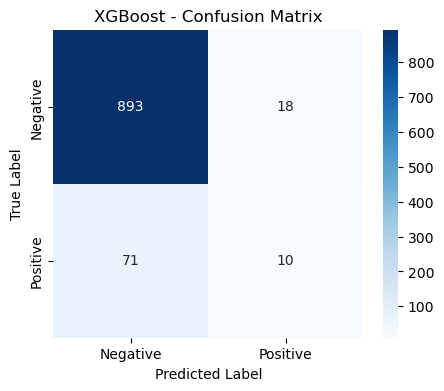


CatBoost Results
ROC-AUC: 0.818 | Accuracy: 0.906
Training Time: 5.4s | Predicting Time: 0.000014s
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       911
         1.0       0.34      0.16      0.22        81

    accuracy                           0.91       992
   macro avg       0.64      0.57      0.58       992
weighted avg       0.88      0.91      0.89       992



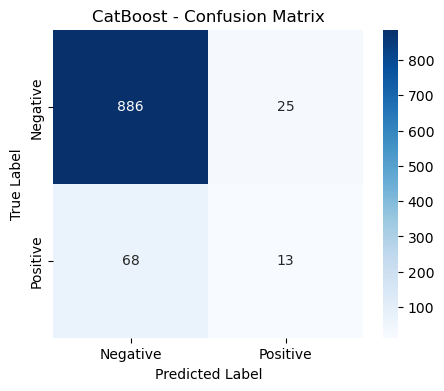


Ensemble model saved as 'WeightedEnsemble.joblib'

Ensemble Model Results
ROC-AUC: 0.825 | Accuracy: 0.908
Precision: 0.876 | Recall: 0.908 | F1-score: 0.887
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95       911
         1.0       0.32      0.11      0.17        81

    accuracy                           0.91       992
   macro avg       0.62      0.55      0.56       992
weighted avg       0.88      0.91      0.89       992


======================================== FINAL RESULTS ========================================
            model  roc_auc  accuracy  precision   recall  f1-score  train_time  predict_time
Weighted Ensemble 0.824735  0.908266   0.876002 0.908266  0.887260         NaN           NaN
          XGBoost 0.819951  0.910282   0.879871 0.910282  0.889738    3.989731      0.000015
         CatBoost 0.818067  0.906250   0.880822 0.906250  0.890393    5.380561      0.000014
         LightGBM 0.816319  0.905242   0.8712

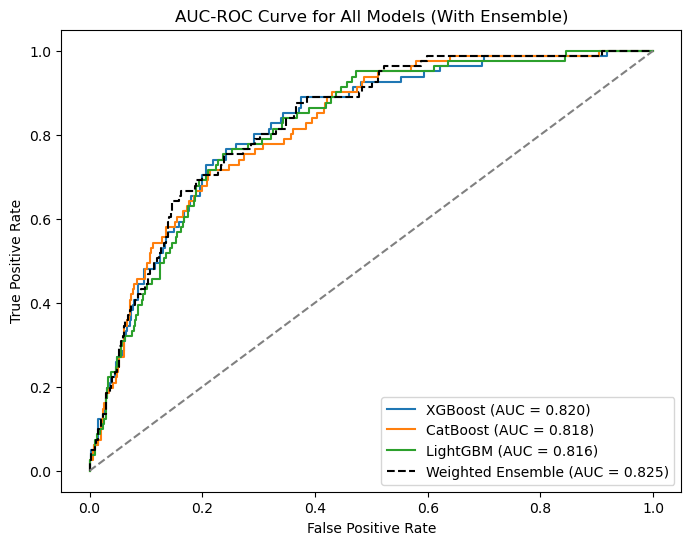

(               model   roc_auc  accuracy  train_time  predict_time  precision  \
 3  Weighted Ensemble  0.824735  0.908266         NaN           NaN   0.876002   
 1            XGBoost  0.819951  0.910282    3.989731      0.000015   0.879871   
 2           CatBoost  0.818067  0.906250    5.380561      0.000014   0.880822   
 0           LightGBM  0.816319  0.905242    3.841019      0.000028   0.871257   
 
      recall  f1-score  support  
 3  0.908266  0.887260      NaN  
 1  0.910282  0.889738    992.0  
 2  0.906250  0.890393    992.0  
 0  0.905242  0.884159    992.0  ,
 {'LightGBM': LGBMClassifier(colsample_bytree=0.8, force_row_wise=True, learning_rate=0.05,
                 n_estimators=200, objective='binary', subsample=0.8, verbose=-1),
  'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=0.8, device=None, early_stopping_rounds=None,
                enable_cat

In [486]:
classify.run_classification2(best_features[1][:200], "DQ_TARGET", all_features)


LightGBM Results
ROC-AUC: 0.817 | Accuracy: 0.906
Training Time: 2.0s | Predicting Time: 0.000030s
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       911
         1.0       0.35      0.17      0.23        81

    accuracy                           0.91       992
   macro avg       0.64      0.57      0.59       992
weighted avg       0.88      0.91      0.89       992



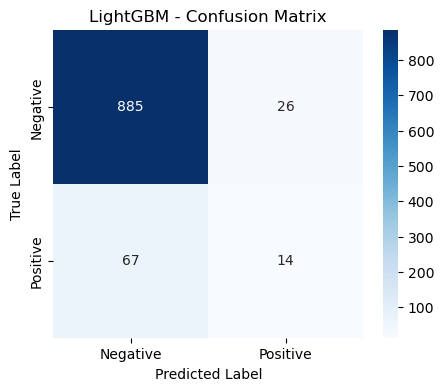


XGBoost Results
ROC-AUC: 0.810 | Accuracy: 0.896
Training Time: 1.7s | Predicting Time: 0.000009s
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94       911
         1.0       0.28      0.17      0.21        81

    accuracy                           0.90       992
   macro avg       0.60      0.57      0.58       992
weighted avg       0.88      0.90      0.88       992



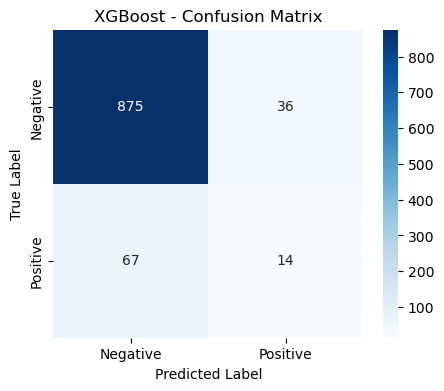


CatBoost Results
ROC-AUC: 0.802 | Accuracy: 0.894
Training Time: 2.8s | Predicting Time: 0.000011s
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94       911
         1.0       0.27      0.17      0.21        81

    accuracy                           0.89       992
   macro avg       0.60      0.57      0.58       992
weighted avg       0.87      0.89      0.88       992



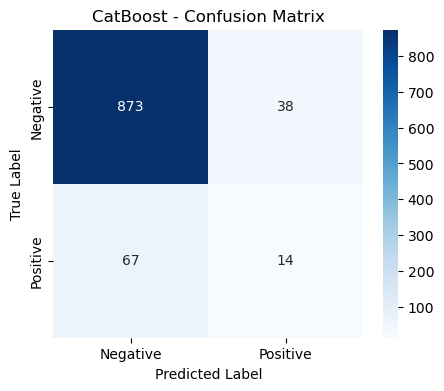


Ensemble model saved as 'WeightedEnsemble.joblib'

Ensemble Model Results
ROC-AUC: 0.815 | Accuracy: 0.900
Precision: 0.877 | Recall: 0.900 | F1-score: 0.886
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       911
         1.0       0.30      0.16      0.21        81

    accuracy                           0.90       992
   macro avg       0.61      0.56      0.58       992
weighted avg       0.88      0.90      0.89       992


======================================== FINAL RESULTS ========================================
            model  roc_auc  accuracy  precision   recall  f1-score  train_time  predict_time
         LightGBM 0.817485  0.906250   0.882294 0.906250  0.891398    1.978519      0.000030
Weighted Ensemble 0.814761  0.900202   0.876599 0.900202  0.886425         NaN           NaN
          XGBoost 0.810343  0.896169   0.875892 0.896169  0.884753    1.666461      0.000009
         CatBoost 0.801629  0.894153   0.8748

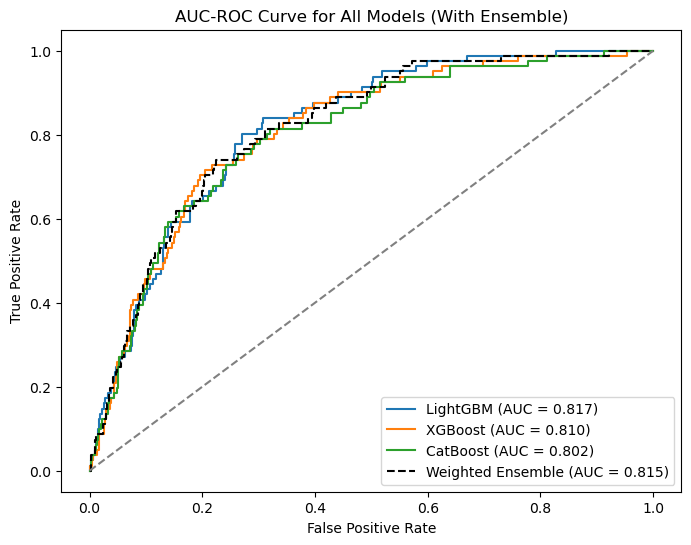

(               model   roc_auc  accuracy  train_time  predict_time  precision  \
 0           LightGBM  0.817485  0.906250    1.978519      0.000030   0.882294   
 3  Weighted Ensemble  0.814761  0.900202         NaN           NaN   0.876599   
 1            XGBoost  0.810343  0.896169    1.666461      0.000009   0.875892   
 2           CatBoost  0.801629  0.894153    2.813065      0.000011   0.874874   
 
      recall  f1-score  support  
 0  0.906250  0.891398    992.0  
 3  0.900202  0.886425      NaN  
 1  0.896169  0.884753    992.0  
 2  0.894153  0.883443    992.0  ,
 {'LightGBM': LGBMClassifier(colsample_bytree=0.8, force_row_wise=True, learning_rate=0.05,
                 n_estimators=200, objective='binary', subsample=0.8, verbose=-1),
  'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=0.8, device=None, early_stopping_rounds=None,
                enable_cat

In [487]:
classify.run_classification2(best_features[2][:100], "DQ_TARGET", all_features)

In [ ]:
categories, consumer, acct, transactions = features.get_datasets()
consumer = consumer[consumer['DQ_TARGET'].isna()]
transactions = transactions[transactions['prism_consumer_id'].isin(consumer['prism_consumer_id'])]
transaction_categories = features.get_transaction_categories(transactions, categories)
all_features = features.one_hot_accounts(acct, consumer, how = 'normal')
all_features = features.get_total_transactions(all_features, transaction_categories)
na_features = features.get_categorical_features2(
    all_features, transaction_categories, acct
)
na_features = na_features.set_index('prism_consumer_id')

In [353]:
na_features

,evaluation_date,credit_score,DQ_TARGET,account_type_401K,account_type_AUTO,account_type_BROKERAGE,account_type_CASH MANAGEMENT,account_type_CD,account_type_CHECKING,account_type_CONSUMER,account_type_CREDIT CARD,account_type_HOME EQUITY,account_type_HSA,account_type_IRA,account_type_LINE OF CREDIT,account_type_LOAN,account_type_MONEY MARKET,account_type_MONEYMARKET,account_type_MORTGAGE,account_type_OTHER,account_type_OVERDRAFT,account_type_PREPAID,account_type_RETIREMENT,account_type_ROTH,account_type_SAVINGS,account_type_STOCK PLAN,account_type_STUDENT,transactions,ACCOUNT_FEES_coef_variation,ATM_CASH_coef_variation,AUTOMOTIVE_coef_variation,AUTO_LOAN_coef_variation,BANKING_CATCH_ALL_coef_variation,BILLS_UTILITIES_coef_variation,BNPL_coef_variation,CORPORATE_PAYMENTS_coef_variation,CREDIT_CARD_PAYMENT_coef_variation,DEBT_coef_variation,DEPOSIT_coef_variation,ENTERTAINMENT_coef_variation,ESSENTIAL_SERVICES_coef_variation,EXTERNAL_TRANSFER_coef_variation,FITNESS_coef_variation,FOOD_AND_BEVERAGES_coef_variation,GAMBLING_coef_variation,GENERAL_MERCHANDISE_coef_variation,GIFTS_DONATIONS_coef_variation,GOVERNMENT_SERVICES_coef_variation,GROCERIES_coef_variation,INSURANCE_coef_variation,INVESTMENT_coef_variation,INVESTMENT_INCOME_coef_variation,LEGAL_coef_variation,LOAN_coef_variation,MISCELLANEOUS_coef_variation,MORTGAGE_coef_variation,OTHER_BENEFITS_coef_variation,OVERDRAFT_coef_variation,PAYCHECK_coef_variation,PETS_coef_variation,REFUND_coef_variation,RENT_coef_variation,RISK_CATCH_ALL_coef_variation,RTO_LTO_coef_variation,SELF_TRANSFER_coef_variation,TAX_coef_variation,TIME_OR_STUFF_coef_variation,TRANSPORATION_coef_variation,TRAVEL_coef_variation,ACCOUNT_FEES_count,ATM_CASH_count,AUTOMOTIVE_count,AUTO_LOAN_count,BANKING_CATCH_ALL_count,BILLS_UTILITIES_count,BNPL_count,CORPORATE_PAYMENTS_count,CREDIT_CARD_PAYMENT_count,DEBT_count,DEPOSIT_count,ENTERTAINMENT_count,ESSENTIAL_SERVICES_count,EXTERNAL_TRANSFER_count,FITNESS_count,FOOD_AND_BEVERAGES_count,GAMBLING_count,GENERAL_MERCHANDISE_count,GIFTS_DONATIONS_count,GOVERNMENT_SERVICES_count,GROCERIES_count,INSURANCE_count,INVESTMENT_count,INVESTMENT_INCOME_count,LEGAL_count,LOAN_count,MISCELLANEOUS_count,MORTGAGE_count,OTHER_BENEFITS_count,OVERDRAFT_count,PAYCHECK_count,PETS_count,REFUND_count,RENT_count,RISK_CATCH_ALL_count,RTO_LTO_count,SELF_TRANSFER_count,TAX_count,TIME_OR_STUFF_count,TRANSPORATION_count,TRAVEL_count,ACCOUNT_FEES_iqr,ATM_CASH_iqr,AUTOMOTIVE_iqr,AUTO_LOAN_iqr,BANKING_CATCH_ALL_iqr,BILLS_UTILITIES_iqr,BNPL_iqr,CORPORATE_PAYMENTS_iqr,CREDIT_CARD_PAYMENT_iqr,DEBT_iqr,DEPOSIT_iqr,ENTERTAINMENT_iqr,ESSENTIAL_SERVICES_iqr,EXTERNAL_TRANSFER_iqr,FITNESS_iqr,FOOD_AND_BEVERAGES_iqr,GAMBLING_iqr,GENERAL_MERCHANDISE_iqr,GIFTS_DONATIONS_iqr,GOVERNMENT_SERVICES_iqr,GROCERIES_iqr,INSURANCE_iqr,INVESTMENT_iqr,INVESTMENT_INCOME_iqr,LEGAL_iqr,LOAN_iqr,MISCELLANEOUS_iqr,MORTGAGE_iqr,OTHER_BENEFITS_iqr,OVERDRAFT_iqr,PAYCHECK_iqr,PETS_iqr,REFUND_iqr,RENT_iqr,RISK_CATCH_ALL_iqr,RTO_LTO_iqr,SELF_TRANSFER_iqr,TAX_iqr,TIME_OR_STUFF_iqr,TRANSPORATION_iqr,TRAVEL_iqr,ACCOUNT_FEES_median,ATM_CASH_median,AUTOMOTIVE_median,AUTO_LOAN_median,BANKING_CATCH_ALL_median,BILLS_UTILITIES_median,BNPL_median,CORPORATE_PAYMENTS_median,CREDIT_CARD_PAYMENT_median,DEBT_median,DEPOSIT_median,ENTERTAINMENT_median,ESSENTIAL_SERVICES_median,EXTERNAL_TRANSFER_median,FITNESS_median,FOOD_AND_BEVERAGES_median,GAMBLING_median,GENERAL_MERCHANDISE_median,GIFTS_DONATIONS_median,GOVERNMENT_SERVICES_median,GROCERIES_median,INSURANCE_median,INVESTMENT_median,INVESTMENT_INCOME_median,LEGAL_median,LOAN_median,MISCELLANEOUS_median,MORTGAGE_median,OTHER_BENEFITS_median,OVERDRAFT_median,PAYCHECK_median,PETS_median,REFUND_median,RENT_median,RISK_CATCH_ALL_median,RTO_LTO_median,SELF_TRANSFER_median,TAX_median,TIME_OR_STUFF_median,TRANSPORATION_median,TRAVEL_median,ACCOUNT_FEES_skewness,ATM_CASH_skewness,AUTOMOTIVE_skewness,AUTO_LOAN_skewness,BANKING_CATCH_ALL_skewness,BILLS_UTILITIES_skewness,BNPL_skewness,CORPORATE_PAYMENTS_s

/opt/anaconda3/lib/python3.12/site-packages/shap/plots/_beeswarm.py:941: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



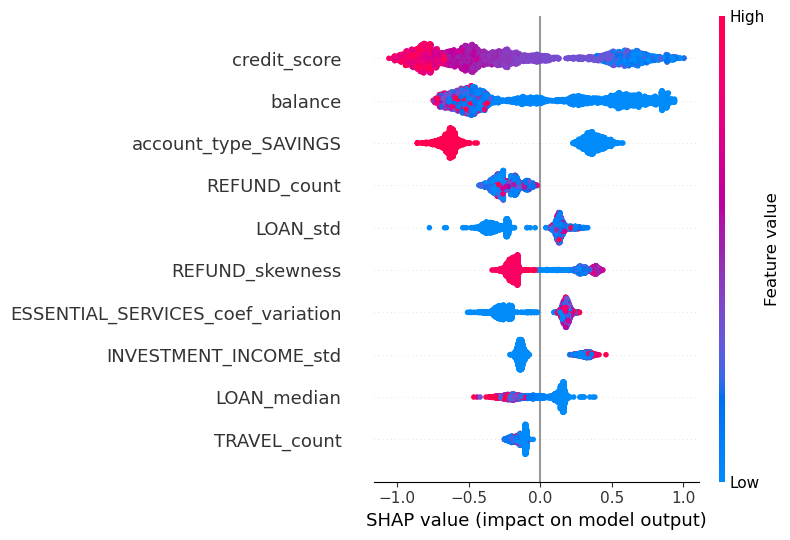

/Users/kevinwong/Library/CloudStorage/GoogleDrive-kew024@ucsd.edu/My Drive/UCSD Winter Quarter 2025/dsc180b/dsc180b-capstone-q2/src/base/classify.py:145: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/Users/kevinwong/Library/CloudStorage/GoogleDrive-kew024@ucsd.edu/My Drive/UCSD Winter Quarter 2025/dsc180b/dsc180b-capstone-q2/src/base/classify.py:153: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



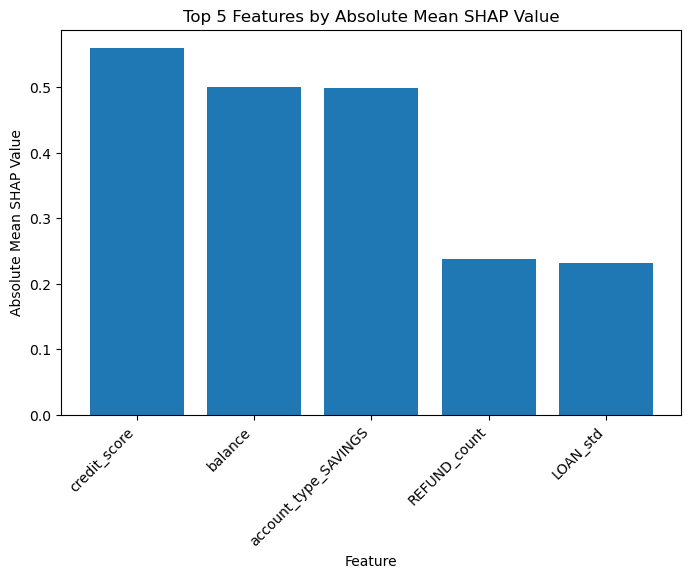

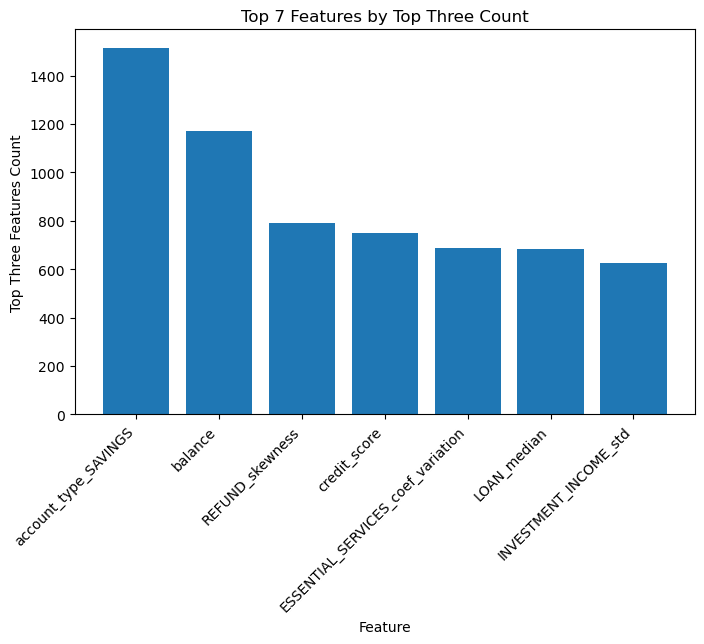

In [465]:
info = classify.individual_test(best_features[1][:75], "CatBoost", na_features)

In [472]:
final_preds = info.reset_index()[['prism_consumer_id', 'probability']]
final_preds = final_preds.rename(columns = {'probability': 'prediction'})
final_preds.to_csv('../../data_q2/ucsd-consDF.csv', index = False)

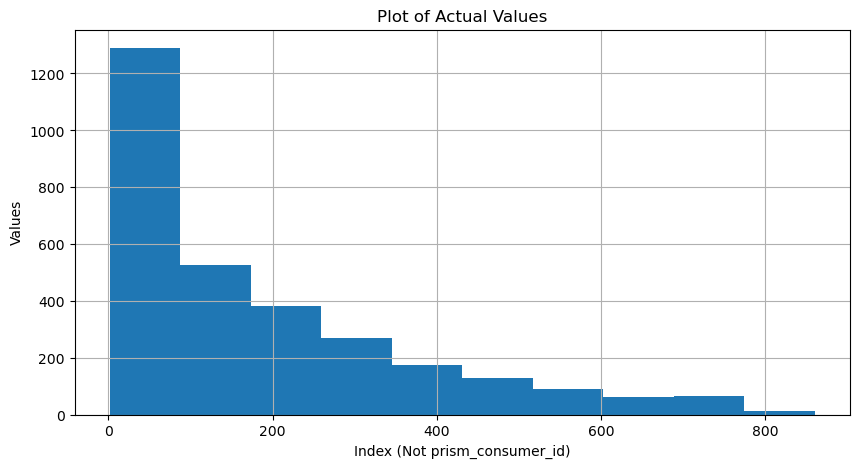

In [470]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(list(info['probability']))

# Labels and title
plt.xlabel("Index (Not prism_consumer_id)")
plt.ylabel("Values")
plt.title("Plot of Actual Values")
plt.grid(True)

In [205]:
info[info['probability'] < 500].shape[0]

2484

In [333]:
info

,probability,top_1_feature,top_1_score,top_2_feature,top_2_score,top_3_feature,top_3_score
prism_consumer_id,,,,,,,
4000,5,ATM_CASH_count,0.197096,ESSENTIAL_SERVICES_count,0.152379,ACCOUNT_FEES_count,0.140193
4001,30,LOAN_count,0.161585,REFUND_mean,0.129386,ACCOUNT_FEES_count,0.117561
4002,5,REFUND_skewness,0.161330,ESSENTIAL_SERVICES_count,0.148610,ACCOUNT_FEES_count,0.121736
4003,36,BANKING_CATCH_ALL_coef_variation,0.265769,ATM_CASH_count,0.206496,ESSENTIAL_SERVICES_count,0.164008
4004,3,ATM_CASH_count,0.206104,LOAN_count,0.145255,ACCOUNT_FEES_count,0.121508
...,...,...,...,...,...,...,...
14995,230,balance,0.474529,account_type_SAVINGS,0.424305,BNPL_mean,0.173496
14996,26,INVESTMENT_INCOME_std,0.285441,BANKING_CATCH_ALL_coef_variation,0.222544,ACCOUNT_FEES_median,0.222124
14997,82,balance,0.482480,account_type_SAVINGS,0.325705,ESSENTIAL_SERVICES_count,0.167627
